- 배깅과 페이스팅
  - bagging, bootstrap aggregating의 줄임말
    - 훈련세트에서 중복을 허용하여 샘플링하는 방법
  - 페이스팅
    - 중복을 허용하지 않고 샘플링하는 방법


    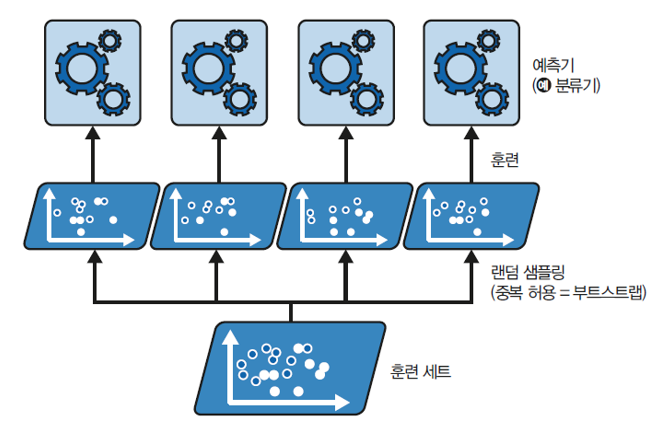

In [26]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
x,y = make_moons(n_samples=100, noise=0.1,random_state=42)

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=int(len(x)*0.8),n_jobs=-1, random_state=42 )
bag_clf.fit(x, y)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=80,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [28]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

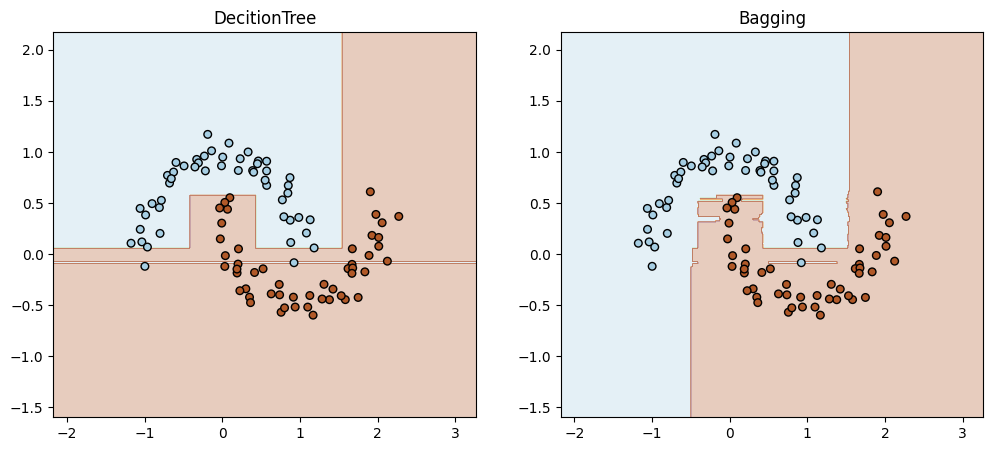

In [29]:
import numpy as np
x_min, x_max = x[:,0].min()-1, x[:,0].max() + 1
y_min, y_max = x[:,1].min()-1, x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01), np.arange(y_min,y_max,0.01))

z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

zt = tree.predict(np.c_[xx.ravel(), yy.ravel()])
zt = zt.reshape(xx.shape)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('DecitionTree')
plt.contourf(xx,yy,zt,alpha=0.3, cmap = plt.cm.Paired)
plt.scatter(x[:,0], x[:,1],c=y,s=30,cmap=plt.cm.Paired, edgecolor='k')


plt.subplot(1,2,2)
plt.title('Bagging')
plt.contourf(xx,yy,z,alpha=0.3, cmap = plt.cm.Paired)
plt.scatter(x[:,0], x[:,1],c=y,s=30,cmap=plt.cm.Paired, edgecolor='k')

plt.show()

- OOB 평가
  - BaggingClassifier는 기본값으로 중복을 허용(bootstrap=True) 훈련세트의 크기만큼 m개 샘플을 선택
    - 평균적으로 각 예측기에 훈련 샘플의 63% 정도만 샘플링된다는 의미
    - OOB(out-of-bag) 샘플 - 선택되지 않는 나머지 37%
  - oob_score = True로 지정하면 훈련이 끝난후에 자동으로 oob평가 수행

In [30]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), 
                            n_estimators=500,max_samples=int(len(x)*0.8),n_jobs=-1, 
                            oob_score=True,
                            random_state=42 )

bag_clf.fit(x, y)
bag_clf.oob_score_

0.94

In [32]:
bag_clf.oob_decision_function_[:3] # 처음 3개 셈플에 대한 확률

array([[0.        , 1.        ],
       [0.34146341, 0.65853659],
       [0.        , 1.        ]])

- 랜덤패치, 랜덤 서브스페이스
  - 랜덤패치
    - 훈련특성과 샘플을 모두 샘플링
  - 램덤 서브스페이스
    - 훈련 샘플을 모두 사용(bootstrap=False 이고 max_samples=1.0)
    - 특성을 샘플링(bootstrap_features=True,그리고/또는 max_feature 1.0보다 작게 설정)
      - 특성을 샘플링 더 다양한 예측기를 만들어서 편향을 늘리는대신에 분산을 낮추는 효과

- 랜덤포레스트

In [33]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier(n_estimators=500,n_jobs=-1)  # n_jobs=-1 모든 가능한 자원을 다 사용

RandomForestClassifier(n_estimators=500, n_jobs=-1)

- 랜덤포레스트 알고리즘 중에 트리의 노드를 분할할때 전체 특성중에 최선의 특성을 찾는대신에 랜덤으로 선택한 특성 후보중에서 최적의 특성을 찾는식으로 
- 무작위성을 더 주는 방식

In [34]:
from sklearn.ensemble import BaggingClassifier
# 기본적으로 root(n) 개의 특성을 선택
BaggingClassifier(max_features='sqrt')

BaggingClassifier(max_features='sqrt')

- 엑스트라 트리
  - 익스트림 랜덤 트리(extremely randomized tree) 앙상블(줄여서 엑스트라 트리)
    - 극단적으로 랜덤하게 만든 트리의 랜덤포레스트
    - ExtraTreeClassfier를 사용

 - 랜덤포레스트의 부수적인 장점
   - 특성 중요도

In [39]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True).data
target = load_iris(as_frame=True).target
rfc = RandomForestClassifier(n_estimators=500,random_state=42)
rfc.fit(data, target)
rfc.feature_importances_, data.columns

(array([0.11249225, 0.02311929, 0.44103046, 0.423358  ]),
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
        'petal width (cm)'],
       dtype='object'))

In [46]:
data.columns[np.argsort(rfc.feature_importances_)[::-1]]

Index(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

from sklearn.ensemble import BaggingClassifier


- 부스팅(boosting)
  - 원래는 가설 부스팅(hypothesis boosting)
  - 약한 학습기를 여러 개 연결해서 강한 학습기를 만드는 앙상블 기법
  - 가장 인기있는 앙상블 부스팅 AdaBoost(adaptive boosting , 에이다부스팅), 그레이디언트 부스팅

샘플의 가중치를 업데이트 하면서 순차적으로 학습하는 AdaBoost

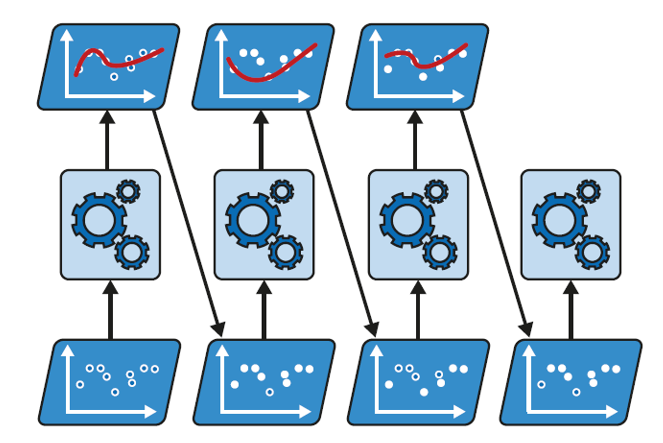

In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
x,y = make_moons(n_samples=100, noise=0.1,random_state=42)
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y, random_state=42)
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30, learning_rate=0.5,random_state=42
)
ada_clf.fit(x_train,y_train)
print(classification_report(y_test,ada_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



c:\Users\USER\miniconda3\envs\20240909\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [53]:
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(x_train, y_train)
print(classification_report(y_test,ada_clf.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



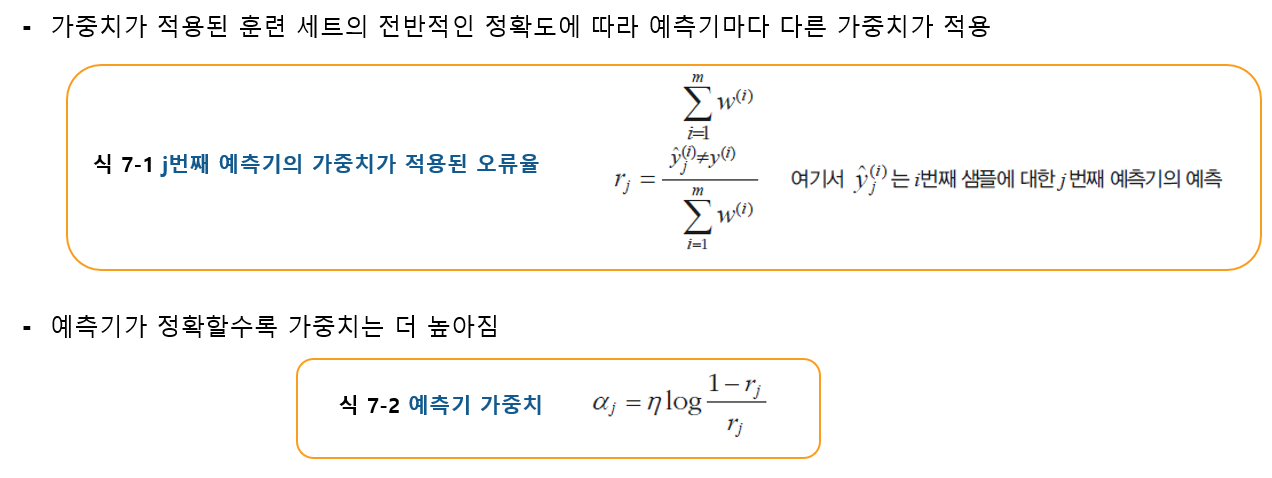

- AdaBoost 알고리즘 가중치를 업데이트
- 잘못 분류된 샘플의 가중치가 높아짐

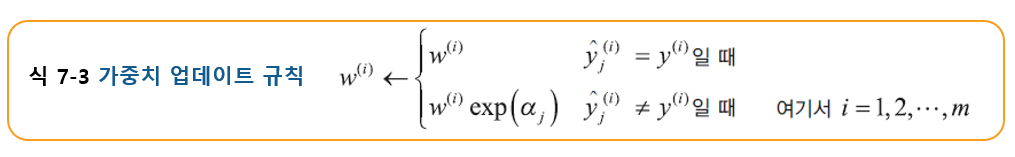

- 모든 샘플의 가중치를 정규화(가중치의 합으로 나눠준다)
- 새로운 예측기가 업데이트된 가중치를 사용해서 훈련 하고 전체 과정이 반복
- 가중치의 합이 큰 클래스가 예측한 결과가 최종 결과


- 스태킹
  - 블렌더 또는 메타 학습기

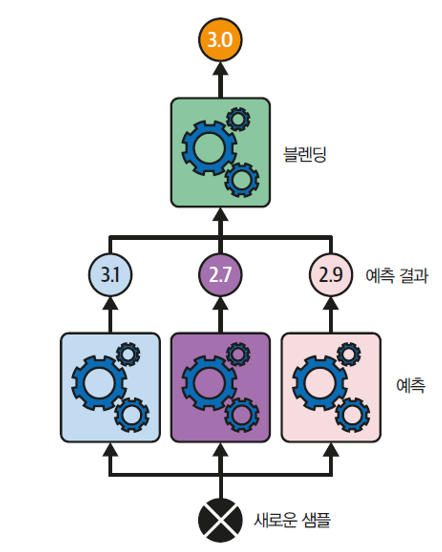

블렌더  학습이 되면 기본 예측기는 전체 원본 훈련 세트로 마지막에 한 번더 훈련

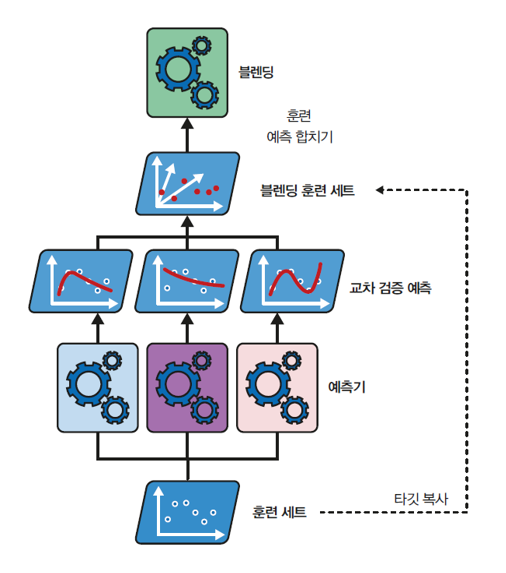

- 여러가지 블렌더(선형회귀를 사용하는 블렌더, 랜덤 포레스트를 회귀를 사용하는 블렌더)를 훈련해서 전체 블렌더 계층을 만든다음
- 그위에 다른 블렌더를 추가해서 최정 예측을 생성
- 다중 스태킹 앙상블

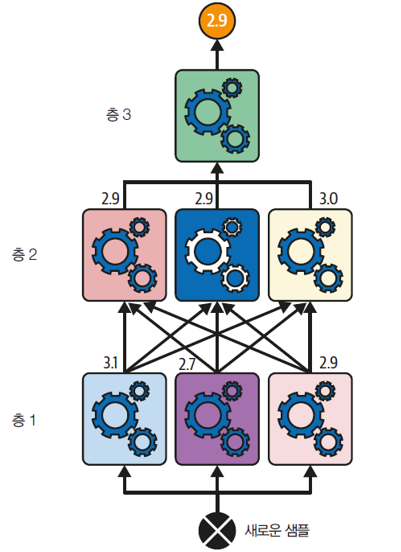

In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
sc = StackingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5
)
sc.fit(x_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=42))

In [ ]:
# 정리
# 앙상블 - 랜덤 포레스트
    # 투표기반 분류기
        # VotingCalssifier   - 알아서 투표... proba 확률을 가져와서 투표   voting = 'soft'
    # 배깅과 페이스팅
        # 베깅(부트스트랩 == 중복허용) -- oob 평가 
        # 페이스팅 중복불허
    # 랜덤 패치와 랜덤 서브스페이스
        # 훈련특성,샘플 샘플링
        # 훈련샘플을 모두사용(부트스트랩을 false)하면서 특성을 샘플링

    # 랜덤 포레스트 : 100개의 트리로 이루어진 학습기, 노드분할 랜덤하게 분할 또는 max_feature = 'sqrt' -> 랜덤대신에 특정 피처에서 최적의 피처를 찾는
        # 무작위성을 더 주입
    # 부스팅 : 여러개의 약한 학습기가 이전 학습기의 가중치를 이어 받아서 학습
    # 스태킹 : 블렌더(섞는다) 여러개의 학습기를 블랜딩하고 최종적으로 베깅방식의 학습기에 다시 섞어서 출력